# 数据来源
数据来源：http://archive.ics.uci.edu/ml/datasets/Heart+Disease
# 字段说明
1. 年龄
2. 性别
3. cp: 胸痛类型，离散标签（1,2,3,4， 4个类型）
4. trestbps:静息血压（入院时以mm Hg计）,连续值
5. chol:血清胆甾醇，单位mg / dl,连续值
6. fbs:（空腹血糖> 120 mg / dl）（1 =正确; 0 =错误）,标签
7. restecg:静息心电图结果,离散标签（0,1,2三个结果）
8. thalach ：达到的最大心率, 连续值
9. exang：运动引起的心绞痛，离散（1 =是； 0 =否）
10. oldpeak： 运动相对于休息引起的ST压抑，连续值
11. slope： 运动ST段的最高斜率，标签，包括3个值
12. ca：被浮雕着色的主要血管数（0-3）
13. thal：3 =正常；6 =固定缺陷；7 =可逆性缺损
14. class，0,1,2,3,4五个类别

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [9]:
# 读取数据
data = pd.read_csv('./heart_disease/processed.cleveland.data')
data.info()
# 可以看出ca跟thal字段类型object有异常值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age           303 non-null float64
sex           303 non-null float64
cp            303 non-null float64
trestbps      303 non-null float64
chol          303 non-null float64
fbs           303 non-null float64
restecg       303 non-null float64
thalach       303 non-null float64
exang         303 non-null float64
oldpeak       303 non-null float64
slope         303 non-null float64
ca            303 non-null object
thal          303 non-null object
predictnum    303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [10]:
data
# 最后一列有问号

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predictnum
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [11]:
# 鉴于ca，thal都是浮点类型，处理异常值,增加一个新标签来表示缺失
# 处理异常值
#data["ca"] = pd.to_numeric(data["ca"], errors='coerce').fillna(method='ffill')
#data["thal"] = pd.to_numeric(data["thal"], errors='coerce').fillna(method='ffill')

data["ca"] = pd.to_numeric(data["ca"], errors='coerce').fillna(5.0)
data["thal"] = pd.to_numeric(data["thal"], errors='coerce').fillna(9.0)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age           303 non-null float64
sex           303 non-null float64
cp            303 non-null float64
trestbps      303 non-null float64
chol          303 non-null float64
fbs           303 non-null float64
restecg       303 non-null float64
thalach       303 non-null float64
exang         303 non-null float64
oldpeak       303 non-null float64
slope         303 non-null float64
ca            303 non-null float64
thal          303 non-null float64
predictnum    303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


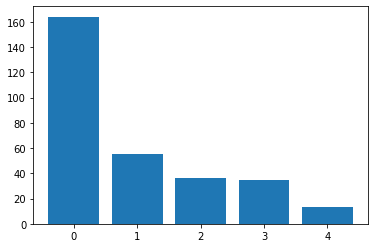

In [21]:
# 计算label分布
def cal_dis(df, name):
    label_dict = {}
    for idx, row in df.iterrows():
        if row[name] not in label_dict:
            label_dict[row[name]] = 0
        label_dict[row[name]] += 1
    sorted_list = sorted(label_dict.items())
    x_v = []
    y_v = []
    for kv in sorted_list:
        x_v.append(kv[0])
        y_v.append(kv[1])
    return x_v, y_v
x_v,y_v = cal_dis(data, "predictnum")
plt.bar(x_v, y_v)
plt.show()

In [24]:
# 处理label：label分为5类0,1,2,3,4,5
# 根据分布，很明显，0以外类相加与0类大致相等，不存在类别不平衡问题
for idx,row in data.iterrows():
    data.loc[idx,"label0"] = 0
    data.loc[idx,"label1"] = 0
    data.loc[idx,"label2"] = 0
    data.loc[idx,"label3"] = 0
    data.loc[idx,"label4"] = 0
    if row["predictnum"] == 0:
        data.loc[idx,"label0"] = 1
    elif row["predictnum"] == 1:
        data.loc[idx,"label1"] = 1
    elif row["predictnum"] == 2:
        data.loc[idx,"label2"] = 1
    elif row["predictnum"] == 3:
        data.loc[idx,"label3"] = 1
    elif row["predictnum"] == 4:
        data.loc[idx,"label4"] = 1
    else:
        pass
    
    # 增加二分类标签,
    if row["predictnum"] == 0:
        data.loc[idx,"bin_label"] = 0
        data.loc[idx,"bin_label0"] = 1
        data.loc[idx,"bin_label1"] = 0
    else:
        data.loc[idx,"bin_label"] = 1
        data.loc[idx,"bin_label0"] = 0
        data.loc[idx,"bin_label1"] = 1

In [25]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,predictnum,label0,label1,label2,label3,label4,bin_label,bin_label0,bin_label1
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,...,6.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,...,3.0,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,...,7.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,...,3.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,...,3.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,...,7.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,...,7.0,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,...,7.0,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,...,3.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [26]:
# 计算特征分布：数值特征
def cal_feature_distribution(df, feature_name, label_name):
    feature_dis = {}
    for idx, row in df.iterrows():
        f_v = row[feature_name]
        f_l = row[label_name]
        if f_v not in feature_dis:
            feature_dis[f_v] = {}
        if f_l not in feature_dis[f_v]:
            feature_dis[f_v][f_l] = 0
        feature_dis[f_v][f_l] += 1
    
    x_res = []
    y_res = []
    z_res = []
    for f_v in feature_dis:
        for f_l in feature_dis[f_v]:
            x_res.append(f_v)
            y_res.append(f_l)
            z_res.append(feature_dis[f_v][f_l])
    return feature_dis, x_res, y_res, z_res

def plot_feature_distribution(df, feature_name, label_name):
    
    age_feature_dis, x_res, y_res, z_res = cal_feature_distribution(df, feature_name, label_name)
    fig = plt.figure()
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
    ax.scatter(x_res, y_res, z_res,marker='o')
    plt.xlabel(feature_name)
    plt.ylabel('label')
    ax.set_zlabel("counter")
    plt.show()


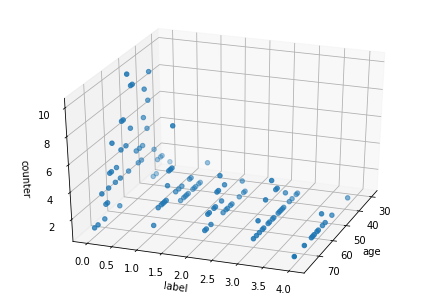

In [32]:
plot_feature_distribution(data, "age", "predictnum")

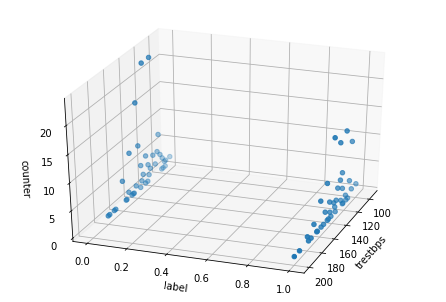

In [30]:
plot_feature_distribution(data, "trestbps", "bin_label")

# 特征筛选
1. 过滤式筛选Relief方法（多分类：Relief-F）;构造猜错猜对近邻，排序选择，线性时间，性能优异
2. 启发式方法：LW方法，随机选择特征做交叉验证，选择最少最优的，当然，如果特征巨大，方法无效
3. 嵌入式：如L1

In [31]:
# 暂时不做
